In [1]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
collision_data = pd.read_csv('collision_reports_processed.csv')
traffic_data = pd.read_csv('traffic_counts_processed.csv')

In [3]:
collision_data.columns

Index(['date_time', 'year', 'month', 'day', 'hour_minute', 'person_role',
       'veh_make', 'charge_desc', 'injured', 'killed', 'street_name_primary',
       'street_name_intersecting'],
      dtype='object')

In [4]:
traffic_data.columns

Index(['date_count', 'street_name', 'total_count'], dtype='object')

In [5]:
# calculate the average traffic count of each street
traffic_groupby_street = traffic_data.groupby('street_name')
traffic_average_street = traffic_groupby_street.sum('total_count') / traffic_groupby_street.count()
traffic_average_street.columns

Index(['date_count', 'total_count'], dtype='object')

In [6]:
# collision count from different car maker and choose those larger than 20
# question: we dont know the total car number of different car maker, so this is not so persuasive
carmaker_count = defaultdict(int)
for d in collision_data['veh_make']:
    carmaker_count[d] += 1
    
carmaker_count = sorted(carmaker_count.items(), key = lambda x: x[1], reverse = True)
carmaker_count = {name: count for name, count in carmaker_count if count >= 20}

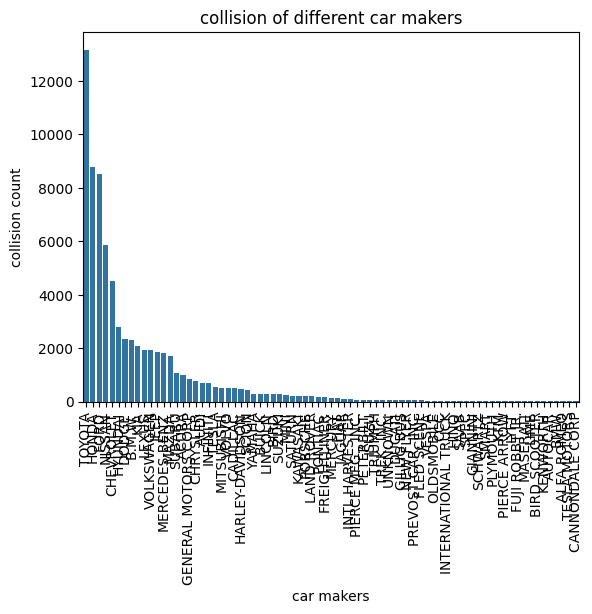

In [7]:
# visualization
sns.barplot(x=carmaker_count.keys(), y=carmaker_count.values())
plt.title('collision of different car makers')
plt.xlabel('car makers')
plt.ylabel('collision count')
plt.xticks(rotation=90)
plt.show()

In [18]:
# collision count of different month
month_count = collision_data.groupby('month').count()
month_count = month_count['date_time']
month_count

month
1     6525
2     5980
3     6570
4     5939
5     6293
6     6493
7     6937
8     7959
9     7775
10    8335
11    6595
12    6621
Name: date_time, dtype: int64

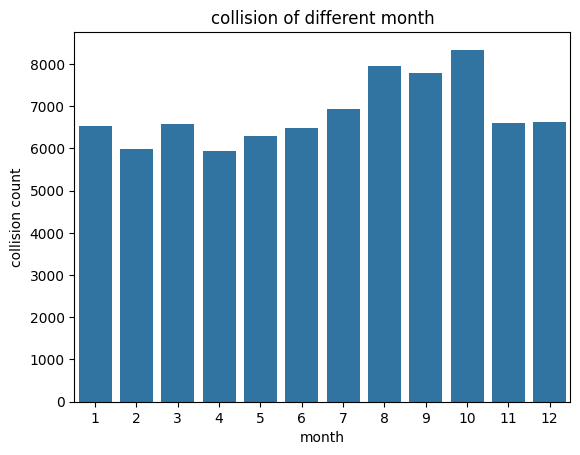

In [21]:
sns.barplot(x=month_count.index, y=month_count.values)
plt.title('collision of different month')
plt.xlabel('month')
plt.ylabel('collision count')
plt.show()

In [23]:
# collision count of different day
day_count = collision_data.groupby('day').count()
day_count = day_count['date_time']
day_count

day
1     2821
2     2696
3     2713
4     2739
5     2867
6     2619
7     2736
8     2673
9     2759
10    2615
11    2806
12    2552
13    2807
14    2781
15    2582
16    2802
17    2614
18    2859
19    2741
20    2712
21    2655
22    2705
23    2699
24    2587
25    2504
26    2575
27    2631
28    2601
29    2503
30    2471
31    1597
Name: date_time, dtype: int64

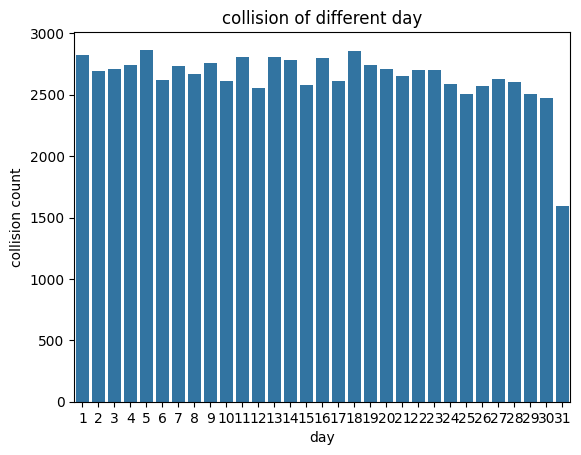

In [24]:
sns.barplot(x=day_count.index, y=day_count.values)
plt.title('collision of different day')
plt.xlabel('day')
plt.ylabel('collision count')
plt.show()

In [10]:
# collision count of different time within a day
hour_count = defaultdict(int)
for t in collision_data['hour_minute']:
    hour_count[t[:2]] += 1
    
hours = sorted(hour_count.items(), key = lambda x: x[0]) 
hours = {hour: count for hour, count in hours}

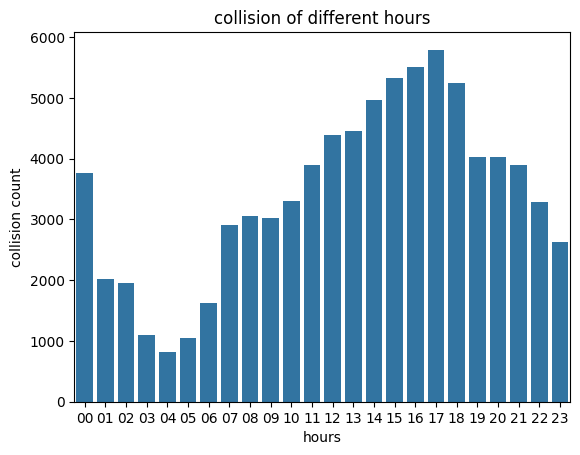

In [11]:
# visualization
sns.barplot(x=hours.keys(), y=hours.values())
plt.title('collision of different hours')
plt.xlabel('hours')
plt.ylabel('collision count')
plt.show()

In [14]:
# collision count in minutes
minute_count = collision_data.groupby('hour_minute').count()
minute_count = minute_count['date_time']
minute_count_dict = defaultdict(int)
for index, value in minute_count.items():
    index_minute = (int(index[:2]) * 60 + int(index[-2:])) // 5
    minute_count_dict[index_minute] += value

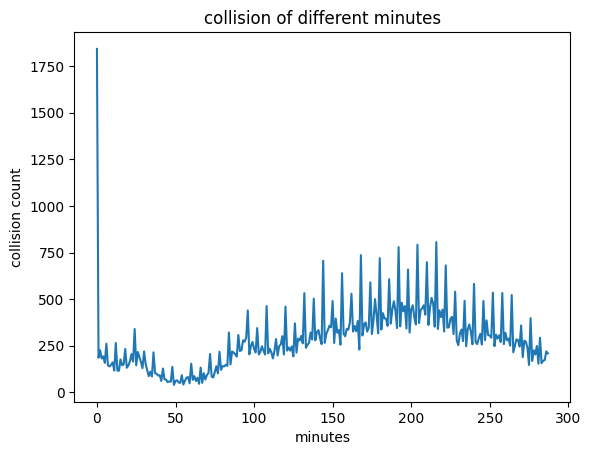

In [15]:
# my plot is ugly, especially this one, try some different ways
sns.lineplot(x=minute_count_dict.keys(), y=minute_count_dict.values())
plt.title('collision of different minutes')
plt.xlabel('minutes')
plt.ylabel('collision count')
plt.show()

In [ ]:
# collision count of different month and day
month_count = collision_data.groupby('month')
month_count = month_count['date_time']
month_count = 

In [259]:
# collision count of each street
street_count = collision_data.groupby('street_name_primary').count()
street_count = street_count['date_time']
street_count.sort_values(ascending = False)

# collision count divided by the average traffic count of the street to describe how dangerous the street is
# the collision rate sort of things
dangerous_coefficient = {}
for index, value in street_count.items():
    if index not in traffic_average_street.index: continue
    dangerous_coefficient[index] = value / traffic_average_street.loc[index]['total_count']

In [260]:
dangerous_coefficient = sorted(dangerous_coefficient.items(), key = lambda x: x[1], reverse = True)
dangerous_coefficient

[('UNIVERSITY AVENUE', 0.1453061470913372),
 ('EL CAJON BOULEVARD', 0.12260906897092286),
 ('IMPERIAL AVENUE', 0.12103399281592113),
 ('MARKET STREET', 0.11026134605619),
 ('LOGAN AVENUE', 0.08257837299288677),
 ('ISLAND AVENUE', 0.07844486495785309),
 ('ORANGE AVENUE', 0.0757874987656759),
 ('THORN STREET', 0.07419927806107833),
 ('EUCLID AVENUE', 0.07088395044805786),
 ('BEECH STREET', 0.07007751937984497),
 ('SPRUCE STREET', 0.069164265129683),
 ('REED AVENUE', 0.06719761075161772),
 ('COWLEY WAY', 0.06363325350667123),
 ('BALBOA DRIVE', 0.06086445163187298),
 ('MISSION BOULEVARD', 0.05975528888318467),
 ('NATIONAL AVENUE', 0.05924431941138281),
 ('DAWES STREET', 0.05852793378657996),
 ('CLAIREMONT MESA BOULEVARD', 0.058043651485855566),
 ('OCEAN VIEW BOULEVARD', 0.05777338810277549),
 ('E STREET', 0.05225078709785034),
 ('FIESTA ISLAND ROAD', 0.05135426157541622),
 ('TROJAN AVENUE', 0.05059220331006353),
 ('FAIRMOUNT AVENUE', 0.050311560169231925),
 ('C STREET', 0.04961248248011213

In [261]:
# average injured people for each collision event based on different role
group_by_role = collision_data.groupby('person_role')
role_injured = group_by_role['injured']
role_injured.sum() / role_injured.count()

person_role
BICYCLIST                  0.982639
DRIVER                     0.882169
OTHER                      0.779412
PARKED VEHICLE OCCUPANT    0.238099
PASSENGER                  1.411320
Name: injured, dtype: float64

In [262]:
# average killed people for each collision event based on different role
role_killed = group_by_role['killed']
role_killed.sum() / role_killed.count()

person_role
BICYCLIST                  0.009722
DRIVER                     0.006944
OTHER                      0.014706
PARKED VEHICLE OCCUPANT    0.002710
PASSENGER                  0.014528
Name: killed, dtype: float64

In [263]:
# try to find the most common collision factor
groupby_collisionfactor = collision_data.groupby('charge_desc')
groupby_collisionfactor = groupby_collisionfactor['injured']
groupby_collisionfactor.count().sort_values(ascending = False)

charge_desc
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE         11615
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)                    10045
UNSAFE SPEED (BASIC SPEED LAW) (I)                              7625
TURNING MOVEMENTS AND REQUIRED SIGNALS                          7229
VIOLATION OF BASIC SPEED LAW, SPEED UNSAFE FOR CONDITIONS       4332
                                                               ...  
MUST WEAR HELMET WHILE OPERATE CLASS 3 ELECTRIC BICYCLE (I)        1
MUST BE ABLE TO REACH AND OPERATE ALL CONTROLS (I)                 1
MISCELLANEOUS NON-HAZARDOUS VIOLATIONS OF THE VEHICLE CODE         1
MINOR UNDER 21YR DRIVE W/BAC 0.05 (I)                              1
MOTORIZED SCOOTER SHALL SAFELY LEAVE BIKE LANE (I)                 1
Name: injured, Length: 387, dtype: int64